In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text

In [2]:
df = pd.read_csv("breast-cancer_csv.csv")
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


Index(['deg-malig', 'deg-malig', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'node-caps_yes', 'breast_right', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low', 'breast-quad_right_up',
       'irradiat_yes'],
      dtype='object')
deg-malig: 0.3555
deg-malig: 0.3555
age_30-39: 0.3036
age_40-49: -0.1141
age_50-59: -0.2213
age_60-69: 0.2236
age_70-79: 0.0618
menopause_lt40: 0.3859
menopause_premeno: 0.2733
tumor-size_10-14: -1.0249
tumor-size_15-19: 0.0526
tumor-size_20-24: 0.3776
tumor-size_25-29: 0.3423
tumor-size_30-34: 0.5033
tumor-size_35-39: 0.07

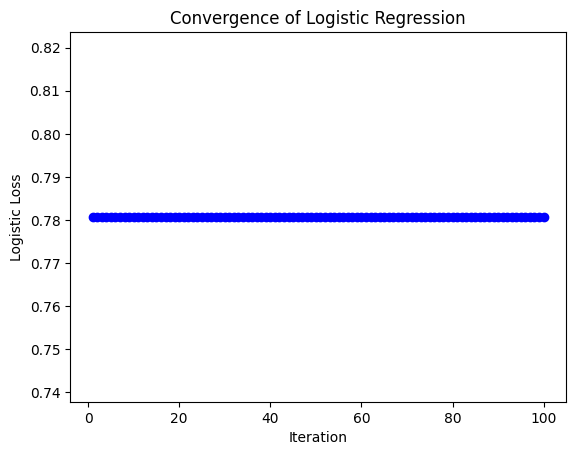

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
X = df.drop("Class", axis=1)
y = df["Class"]

# Convert target variable to numeric values
le = LabelEncoder()
y = le.fit_transform(y)

categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_combined = pd.concat([X.select_dtypes(exclude=['object']), X_encoded], axis=1)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_combined, y)

coefficients = logistic_regression_model.coef_[0]
print(X_combined.columns)
for feature, coef in zip(X_combined.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

intercept = logistic_regression_model.intercept_[0]
print(f"Intercept: {intercept:.4f}")

# loss at each iteration
iterations = 100 
losses = []

for i in range(iterations):
    logistic_regression_model.fit(X_combined, y)
    
    # Get predicted probabilities 
    probs = logistic_regression_model.decision_function(X_combined)
    
    # Compute loss 
    loss = np.log(1 + np.exp(-y * probs)).mean()  # the convex cross entropy cost function
    losses.append(loss)

# Plot the graph of convergence
plt.plot(np.arange(1, iterations + 1), losses, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Logistic Loss')
plt.title('Convergence of Logistic Regression')
plt.show()



----- Fold 1 -----
Confusion Matrix:
[[40  1]
 [10  7]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.98      0.88        41
     Class 1       0.88      0.41      0.56        17

    accuracy                           0.81        58
   macro avg       0.84      0.69      0.72        58
weighted avg       0.82      0.81      0.79        58



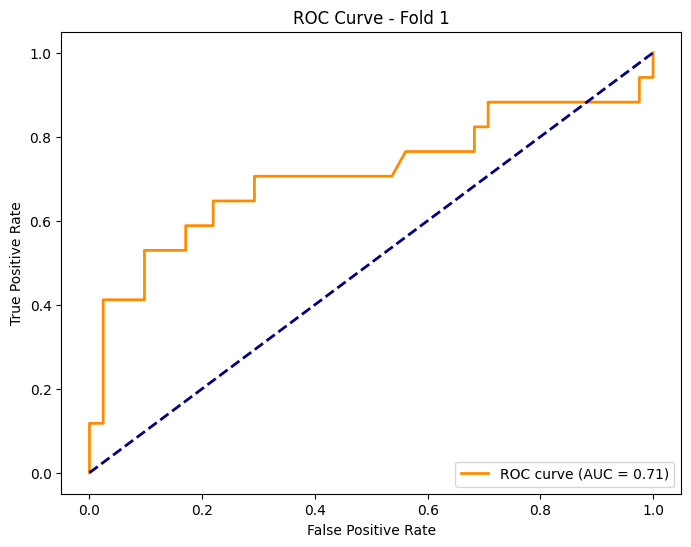


----- Fold 2 -----
Confusion Matrix:
[[38  2]
 [14  3]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.95      0.83        40
     Class 1       0.60      0.18      0.27        17

    accuracy                           0.72        57
   macro avg       0.67      0.56      0.55        57
weighted avg       0.69      0.72      0.66        57



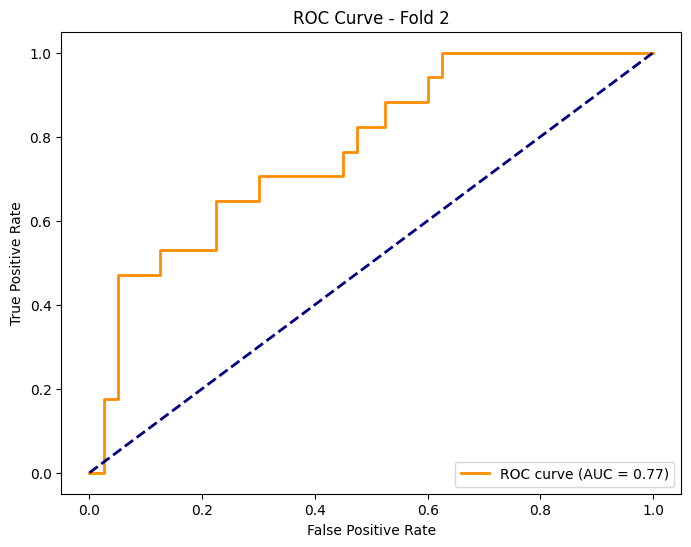


----- Fold 3 -----
Confusion Matrix:
[[32  8]
 [12  5]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.73      0.80      0.76        40
     Class 1       0.38      0.29      0.33        17

    accuracy                           0.65        57
   macro avg       0.56      0.55      0.55        57
weighted avg       0.63      0.65      0.63        57



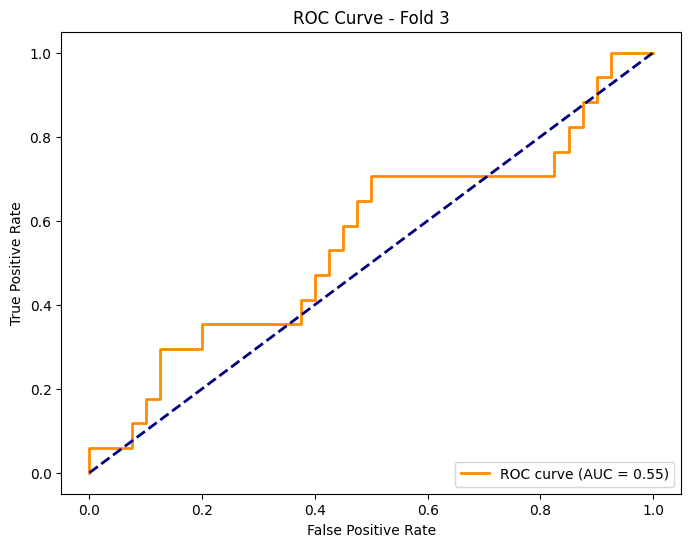


----- Fold 4 -----
Confusion Matrix:
[[28 12]
 [11  6]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.70      0.71        40
     Class 1       0.33      0.35      0.34        17

    accuracy                           0.60        57
   macro avg       0.53      0.53      0.53        57
weighted avg       0.60      0.60      0.60        57



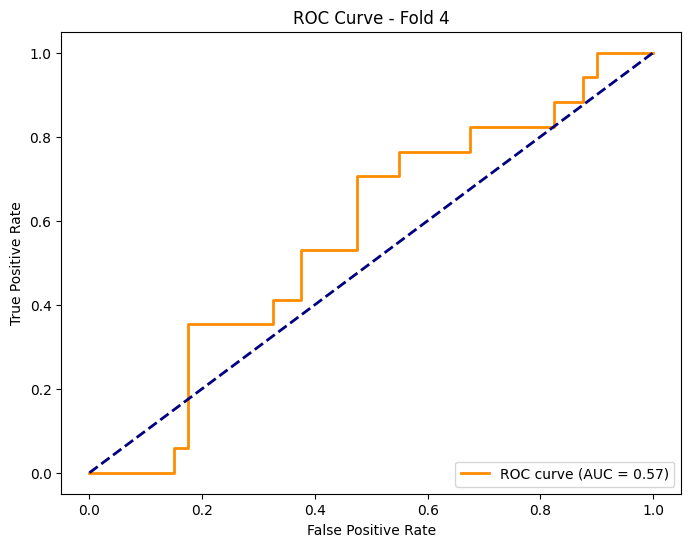


----- Fold 5 -----
Confusion Matrix:
[[35  5]
 [12  5]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.74      0.88      0.80        40
     Class 1       0.50      0.29      0.37        17

    accuracy                           0.70        57
   macro avg       0.62      0.58      0.59        57
weighted avg       0.67      0.70      0.68        57



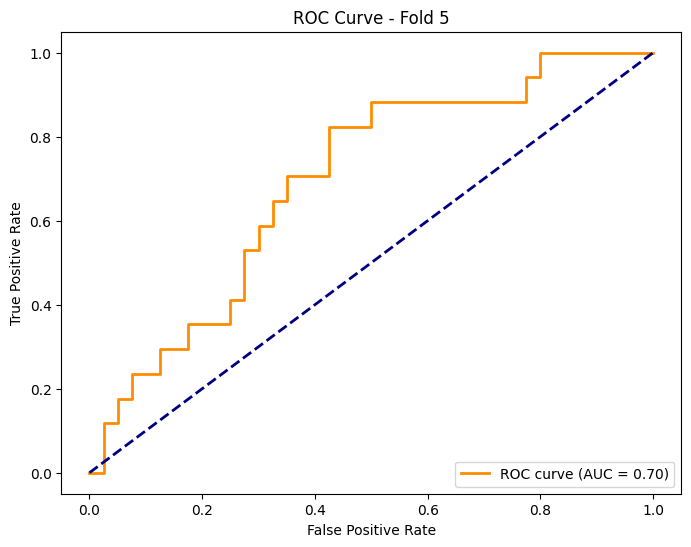


----- Mean of Recall, Precision, F1-Score -----
Recall: 0.6958
Precision: 0.6672
F1-Score: 0.6728


In [99]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Use StratifiedKFold for stratified sampling in cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold cross-validation and get predicted probabilities
y_probs = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Get predicted classes for each split
y_pred = np.round(y_probs)

for i, (train, test) in enumerate(cv.split(X, y)):
    print(f"\n----- Fold {i + 1} -----")
    model.fit(X.iloc[train], y[train])
    y_pred_split = model.predict(X.iloc[test])
    y_probs_split = model.predict_proba(X.iloc[test])[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y[test], y_pred_split)
    print(f"Confusion Matrix:\n{cm}")

    # Classification Report
    report = classification_report(y[test], y_pred_split, target_names=['Class 0', 'Class 1'])
    print(f"Classification Report:\n{report}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y[test], y_probs_split)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Fold {i + 1}')
    plt.legend(loc="lower right")
    plt.show()
    
mean_report = classification_report(y, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)['weighted avg']
print(f"\n----- Mean of Recall, Precision, F1-Score -----")
print(f"Recall: {mean_report['recall']:.4f}")
print(f"Precision: {mean_report['precision']:.4f}")
print(f"F1-Score: {mean_report['f1-score']:.4f}")

In [116]:
best_model = model.fit(X, y)
# Export the best model to a file
model_filename = "best_logistic_regression_model.joblib"
joblib.dump(best_model, model_filename)
print(f"\nBest Model exported to: {model_filename}")


Best Model exported to: best_logistic_regression_model.joblib


In [119]:
# Import the best model from the file
imported_model = joblib.load(model_filename)


In [120]:
# Assuming df is your original dataset
original_columns = df.drop("Class", axis=1).columns

# Create a new sample with the same columns
new_sample_data = [['40-49', 'premeno', '35-39', '0-2', 'yes',3, 'right', 'left_low', 'yes']]
new_sample = pd.DataFrame(new_sample_data, columns=original_columns)


In [ ]:
# Apply the same preprocessing steps to the new sample
new_sample_encoded = preprocessor.transform(new_sample)
#print(new_sample_encoded)
predicted_class = imported_model.predict(new_sample_encoded)
predicted_class_label = le.inverse_transform(predicted_class)[0]

print(f"Predicted Class for the New Sample: {predicted_class_label}")